In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.style.use('ggplot')

In [39]:
trading_weeks = 52

In [40]:
datas = pd.read_excel('C:/Users/test/Desktop/Github/My portfolio_VSGX.xlsx',sheet_name='Summary',index_col='Date')

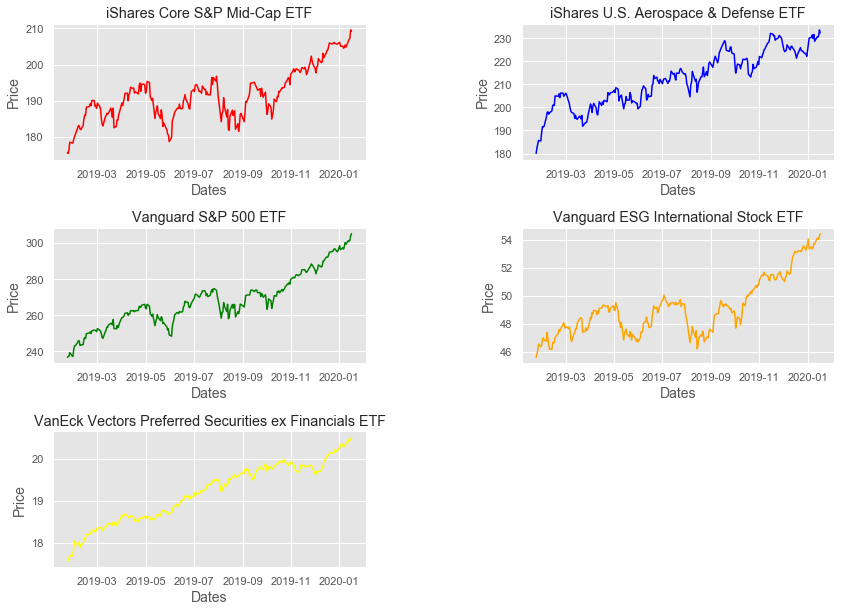

In [41]:
fig1 =plt.figure(figsize=(14,10)) #horizontal&vertical length
plt.subplots_adjust(hspace=.5,wspace=.5) # it adds space in between plots

plt.subplot(323) #The first digit means the amount of rows, the second the amount of columns. The figure will be equally divided based on the number of rows and columns you specify. The last digit will then 'pick' one of those places and return the axes for it
ax = plt.gca()
ax.plot(datas['VOO'], color = 'green')
ax.set_xlabel('Dates',fontsize=14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('Vanguard S&P 500 ETF')

plt.subplot(321)
ax = plt.gca()
ax.plot(datas['IJH'], color = 'red')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('iShares Core S&P Mid-Cap ETF')

plt.subplot(322)
ax = plt.gca()
ax.plot(datas['ITA'], color ='blue')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('iShares U.S. Aerospace & Defense ETF')

plt.subplot(324)
ax = plt.gca()
ax.plot(datas['VSGX'], color='orange')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('Vanguard ESG International Stock ETF')

plt.subplot(325)
ax = plt.gca()
ax.plot(datas['PFXF'], color ='yellow')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('VanEck Vectors Preferred Securities ex Financials ETF')

plt.show();
fig1.savefig('prices.png',dpi=fig1.dpi)

In [42]:
normalized_series = (datas/datas.iloc[0])

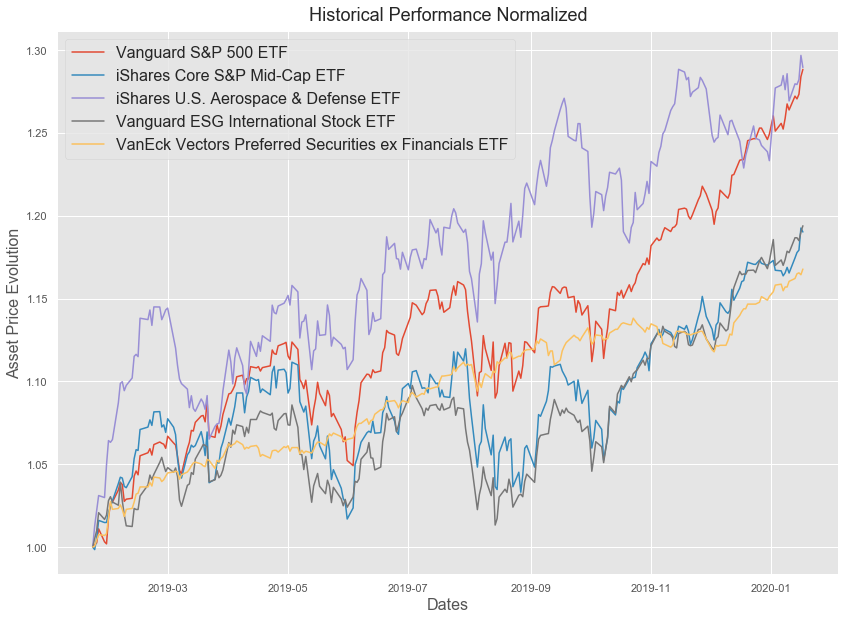

In [43]:
from matplotlib import patheffects
fig2 =plt.figure(figsize=(14,10))
plt.plot(normalized_series)

title_text_obj = plt.title("Historical Performance Normalized", fontsize = 18,
                           verticalalignment = 'bottom')
#title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])
#pe = patheffects.withSimplePatchShadow(offset = (1, -1), shadow_rgbFace = (1,0,0),
#                                      alpha = 0.8)
xlabel_obj = plt.xlabel('Dates', fontsize = 16)
ylabel_obj = plt.ylabel('Asset Price Evolution', fontsize = 16)
#('VOO','IJH','ITA','VSGX','PFXF')
plt.legend(('Vanguard S&P 500 ETF','iShares Core S&P Mid-Cap ETF','iShares U.S. Aerospace & Defense ETF','Vanguard ESG International Stock ETF','VanEck Vectors Preferred Securities ex Financials ETF'),fontsize = 16)
plt.show()
fig2.savefig('norm_prices.png',dpi=fig2.dpi);

In [44]:
datas_returns = np.log(datas/datas.shift(1))
datas_returns.dropna(inplace=True)

In [45]:
stats = pd.DataFrame()
ten_year_treasury_yield_2019 = 2.09
stats['Annualized Returns(%)'] =datas_returns.mean() * trading_weeks *100
stats['Annualized Volatility(%)'] = datas_returns.std() * np.sqrt(trading_weeks)*100
stats['Sharpe Ratio'] = (stats['Annualized Returns(%)']-ten_year_treasury_yield_2019) /stats['Annualized Volatility(%)']

In [46]:
#print(82*'-')
print('Assets Classes Annualized Statistics - full observation period')
stats.style.bar(color=['red','green'], align='zero')

Assets Classes Annualized Statistics - full observation period


,Annualized Returns(%),Annualized Volatility(%),Sharpe Ratio
VOO,5.2698,5.30538,0.599353
IJH,3.6215,6.2468,0.245165
ITA,5.28853,6.91732,0.462395
VSGX,3.68706,4.9585,0.322085
PFXF,3.22668,1.97041,0.576876


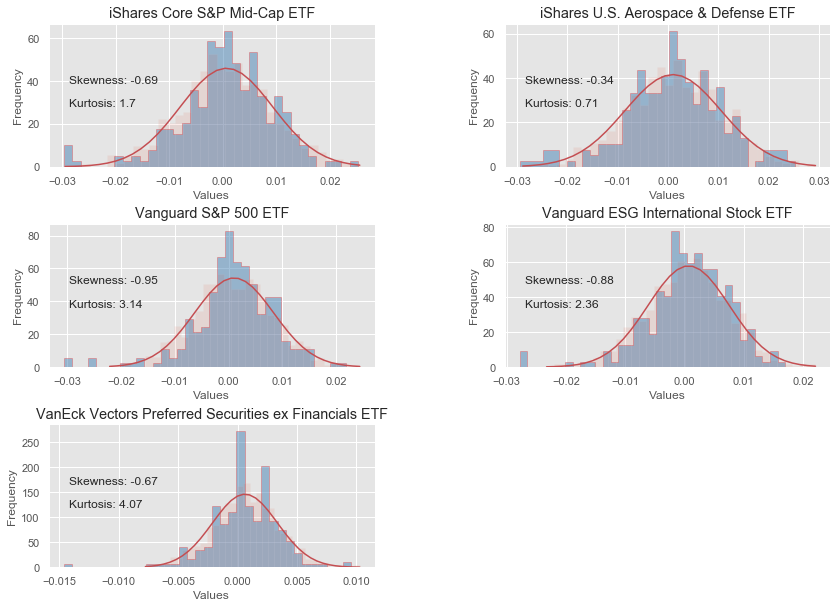

In [47]:
binsnumber = 35

fig3, ax = plt.subplots(figsize=(14,10))
plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots
plt.subplot(323)
ax = plt.gca()

ax.hist(datas_returns['VOO'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datas_returns['VOO'].std(),datas_returns['VOO'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datas_returns['VOO'].skew(),2),round(datas_returns['VOO'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Vanguard S&P 500 ETF')

plt.subplot(321)
ax1 = plt.gca()
ax1.hist(datas_returns['IJH'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datas_returns['IJH'].std(),datas_returns['IJH'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax1.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datas_returns['IJH'].skew(),2),round(datas_returns['IJH'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)


ax1.set_xlabel('Values')
ax1.set_ylabel('Frequency')
ax1.set_title('iShares Core S&P Mid-Cap ETF')

plt.subplot(322)
ax = plt.gca()
ax.hist(datas_returns['ITA'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datas_returns['ITA'].std(),datas_returns['ITA'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datas_returns['ITA'].skew(),2),round(datas_returns['ITA'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)


ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('iShares U.S. Aerospace & Defense ETF')

plt.subplot(324)
ax = plt.gca()
ax.hist(datas_returns['VSGX'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datas_returns['VSGX'].std(),datas_returns['VSGX'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datas_returns['VSGX'].skew(),2),round(datas_returns['VSGX'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)


ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Vanguard ESG International Stock ETF')

plt.subplot(325)
ax = plt.gca()
ax.hist(datas_returns['PFXF'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datas_returns['PFXF'].std(),datas_returns['PFXF'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datas_returns['PFXF'].skew(),2),round(datas_returns['PFXF'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)


ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('VanEck Vectors Preferred Securities ex Financials ETF')

plt.show();
fig3.savefig('histos.png',dpi=fig3.dpi)

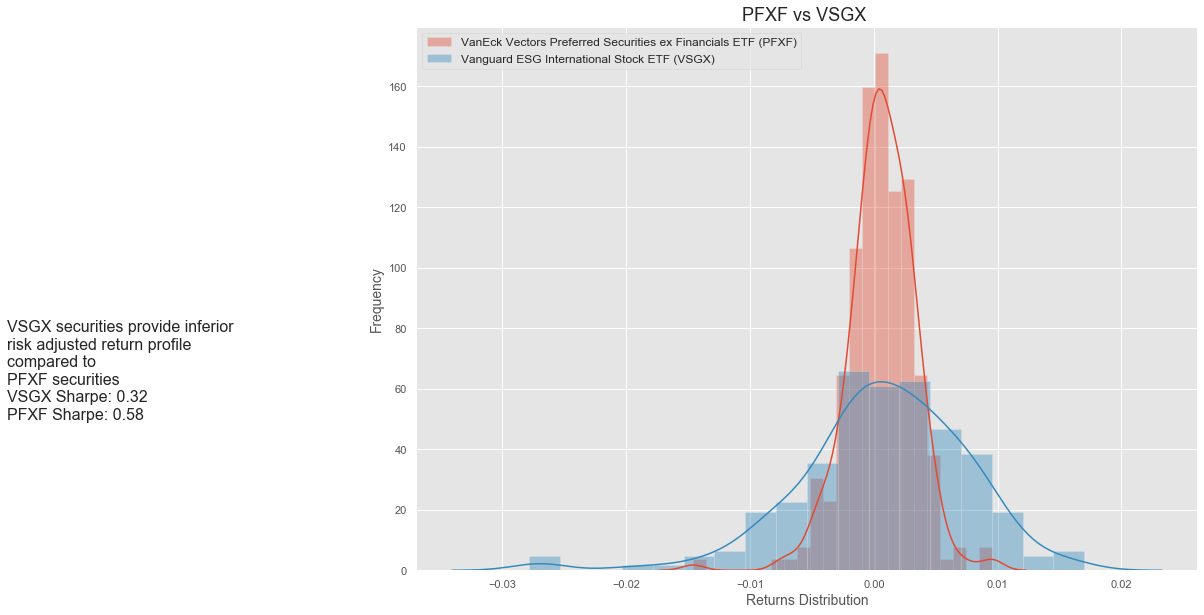

In [48]:
fig4 = plt.figure(figsize=(14,10))
sns.distplot(datas_returns['PFXF'])
sns.distplot(datas_returns['VSGX'])
plt.legend(('VanEck Vectors Preferred Securities ex Financials ETF (PFXF)','Vanguard ESG International Stock ETF (VSGX)'),fontsize = 12)

# anotate an important value
plt.annotate('VSGX securities provide inferior\nrisk adjusted return profile\ncompared to \nPFXF securities\nVSGX Sharpe: {}\nPFXF Sharpe: {}'.format(round(stats.loc['VSGX','Sharpe Ratio'],2),round(stats.loc['PFXF','Sharpe Ratio'],2)),
             xy=(-.01,40),xycoords = 'data',xytext =(-.07, 50),fontsize=16)
plt.title('PFXF vs VSGX ',fontsize=18)
plt.xlabel('Returns Distribution', fontsize= 14)
plt.ylabel('Frequency',fontsize=14)
plt.show();
fig4.savefig('histbonds.png',dpi=fig4.dpi)

In [49]:
allocation = pd.DataFrame(data =[[.30,.30],[.35,.35],[.15,.15],[0,.20],[.20,0]],
                          index=['VOO','IJH','ITA','VSGX','PFXF'],
                         columns =['No_VSGX','VSGX'])
allocation

,No_VSGX,VSGX
VOO,0.30,0.30
IJH,0.35,0.35
ITA,0.15,0.15
VSGX,0.00,0.20
PFXF,0.20,0.00


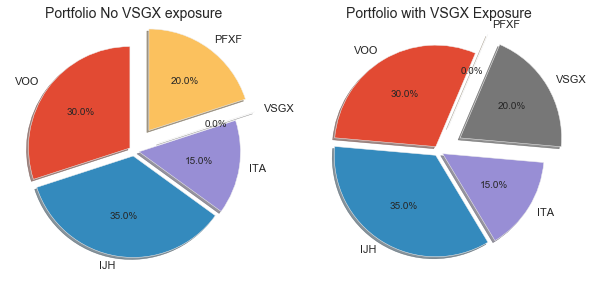

In [50]:
fig5 =plt.figure(figsize=(10,8))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])
explode = [.05,.05,.05,.25,.25]

labels = ['VOO','IJH','ITA','VSGX','PFXF']

plt.subplot(121)
plt.pie(allocation['No_VSGX'], explode = explode, labels= labels,
       autopct= '%1.1f%%', startangle = 90,shadow=True)
plt.title('Portfolio No VSGX exposure',fontsize =14)

plt.subplot(122)
plt.pie(allocation['VSGX'], explode = explode, labels= labels,
       autopct= '%1.1f%%', startangle = 67, shadow= True)
plt.title('Portfolio with VSGX Exposure',fontsize =14)

plt.show();
fig5.savefig('pies.png',dpi=fig5.dpi)

In [51]:
normalized_series1 = normalized_series.copy()

In [52]:
normalized_series1['VSGX'] = normalized_series[['VOO','IJH','ITA','VSGX','PFXF']].mul(allocation.VSGX.values,axis=1).sum(axis=1)
normalized_series1['no_VSGX'] = normalized_series.mul(allocation['No_VSGX'].values,axis=1).sum(axis=1)

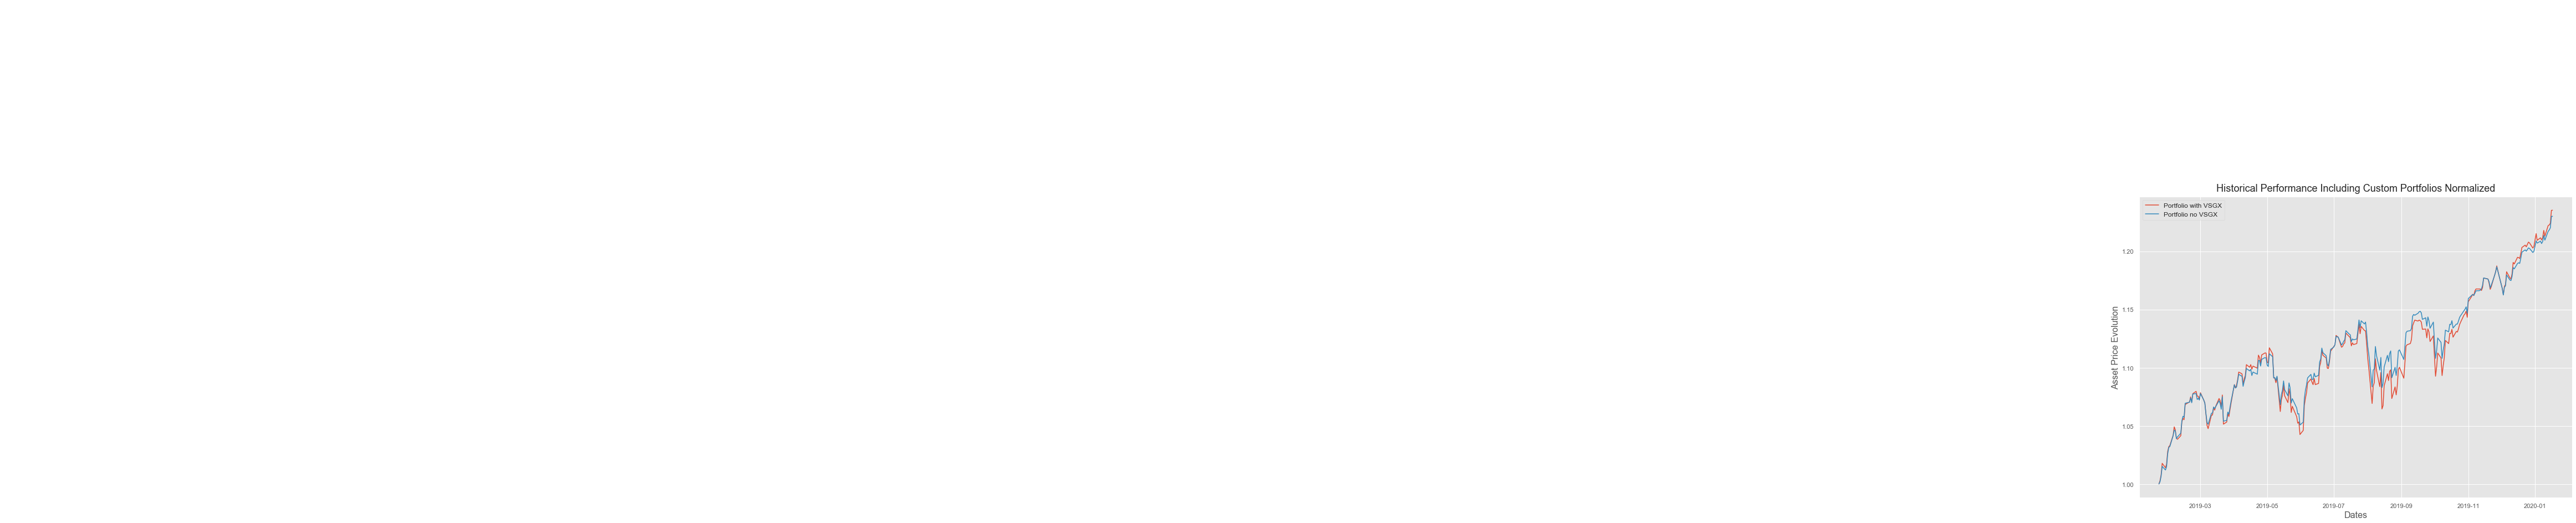

In [53]:
fig6 =plt.figure(figsize=(14,10))
ax = plt.gca()
ax.plot(normalized_series1[['VSGX','no_VSGX']])

title_text_obj = plt.title("Historical Performance Including Custom Portfolios Normalized", fontsize = 18,
                          verticalalignment = 'bottom')
#title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])
#pe = patheffects.withSimplePatchShadow(offset = (1, -1), shadow_rgbFace = (1,0,0),
#                                      alpha = 0.8)
xlabel_obj = plt.xlabel('Dates', fontsize = 16)
ylabel_obj = plt.ylabel('Asset Price Evolution', fontsize = 16)
#('VOO','IJH','ITA','VSGX','PFXF')
ax.legend(('Portfolio with VSGX', 'Portfolio no VSGX'),fontsize = 12)
ax.annotate('VSGX Portfolio provides \nhigher risk adjusted return',('2018-04-30',1.4),xycoords = 'data',xytext =('2013-08-30',1.4),arrowprops =dict(arrowstyle ='->'),fontsize=14)
plt.show()
fig6.savefig('portfolioscomp.png',dpi=fig6.dpi)

In [54]:
datas_returns.corr('pearson')

,VOO,IJH,ITA,VSGX,PFXF
VOO,1.000000,0.899134,0.696579,0.853787,0.509475
IJH,0.899134,1.000000,0.687580,0.768135,0.399380
ITA,0.696579,0.687580,1.000000,0.571100,0.377219
VSGX,0.853787,0.768135,0.571100,1.000000,0.418975
PFXF,0.509475,0.399380,0.377219,0.418975,1.000000


In [55]:
Expected_Return_noVSGX = np.sum(datas_returns.mean()* allocation.No_VSGX)* trading_weeks
Expected_Std_noVSGX = np.sqrt(np.dot(allocation.No_VSGX.T,np.dot(datas_returns.cov()*trading_weeks,
                                                             allocation.No_VSGX)))
Sharpe_noVSGX = Expected_Return_noVSGX / Expected_Std_noVSGX

In [56]:
Expected_Return_VSGX = np.sum(datas_returns.mean()* allocation.VSGX)* trading_weeks
Expected_Std_VSGX = np.sqrt(np.dot(allocation.VSGX.T,np.dot(datas_returns.cov()*trading_weeks,
                                                             allocation.VSGX)))
Sharpe_VSGX = Expected_Return_VSGX / Expected_Std_VSGX

In [57]:
print('Key Stats: Portfolio with no VSGX Securities ')
print(82*'=')
print('Annualized Returns: {:.3%}'.format(Expected_Return_noVSGX))
print('Annualized Volatility: {:.3%}'.format(Expected_Std_noVSGX))
print('Sharpe Ratio: {:.4}'.format(Sharpe_noVSGX))
print(82*'-')
print('Key Stats: Portfolio with VSGX Securities ')
print(82*'=')
print('Annualized Returns: {:.3%}'.format(Expected_Return_VSGX))
print('Annualized Volatility: {:.3%}'.format(Expected_Std_VSGX))
print('Sharpe Ratio: {:.4}'.format(Sharpe_VSGX))
print(82*'-')

Key Stats: Portfolio with no VSGX Securities 
Annualized Returns: 4.287%
Annualized Volatility: 4.675%
Sharpe Ratio: 0.9169
----------------------------------------------------------------------------------
Key Stats: Portfolio with VSGX Securities 
Annualized Returns: 4.379%
Annualized Volatility: 5.315%
Sharpe Ratio: 0.8239
----------------------------------------------------------------------------------


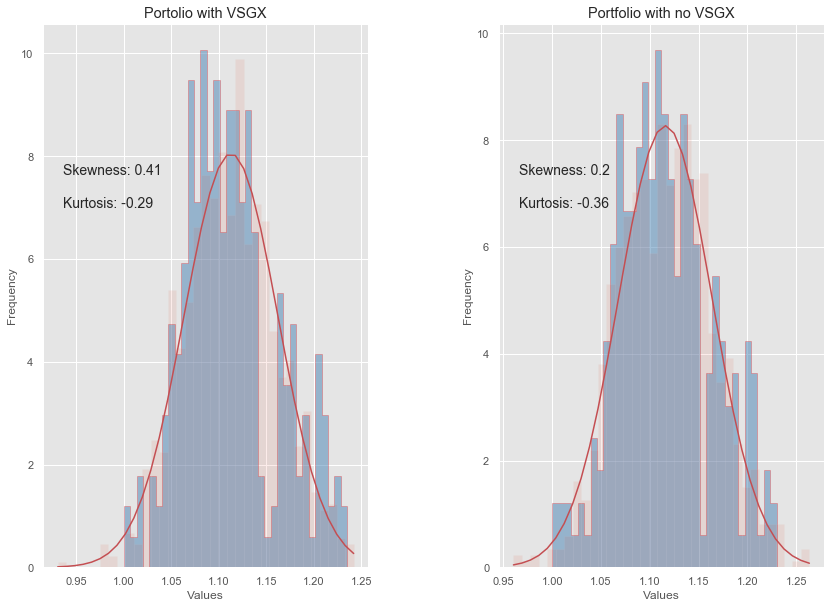

In [58]:
binsnumber = 35

fig7, ax = plt.subplots(figsize=(14,10))
plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots
plt.subplot(121)
ax = plt.gca()

ax.hist(normalized_series1['VSGX'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = normalized_series1['VSGX'].std(),normalized_series1['VSGX'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(normalized_series1['VSGX'].skew(),2),round(normalized_series1['VSGX'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,360),fontsize=14)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Portolio with VSGX')

plt.subplot(122)
ax1 = plt.gca()
ax1.hist(normalized_series1['no_VSGX'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = normalized_series1['no_VSGX'].std(),normalized_series1['no_VSGX'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax1.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(normalized_series1['no_VSGX'].skew(),2),round(normalized_series1['no_VSGX'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,360),fontsize=14)


ax1.set_xlabel('Values')
ax1.set_ylabel('Frequency')
ax1.set_title('Portfolio with no VSGX')
plt.show();
fig7.savefig('portfolioshistos.png',dpi=fig7.dpi)

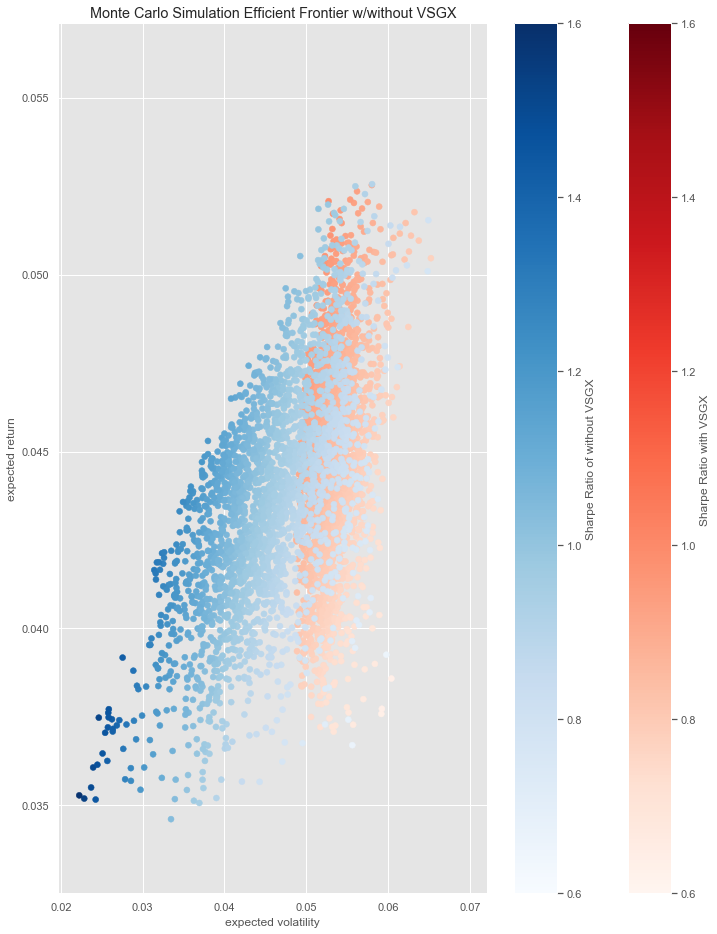

In [59]:
pretsVSGX = []
pvolsVSGX = []

prets_noVSGX = []
pvols_noVSGX = []

[['VOO','IJH','ITA','VSGX']]
[['VOO','IJH','ITA','PFXF']]

for p in range(2500):
    weights = np.random.random(len(allocation)-1)
    weights /= np.sum(weights)
    pretsVSGX.append(np.sum(datas_returns[['VOO','IJH','ITA','VSGX']].mean()* weights)* trading_weeks)
    pvolsVSGX.append(np.sqrt(np.dot(weights.T,np.dot(datas_returns[['VOO','IJH','ITA','VSGX']].cov()*trading_weeks,
                                                             weights))))
pretsVSGX = np.array(pretsVSGX)
pvolsVSGX = np.array(pvolsVSGX)

for p in range(2500):
    weights = np.random.random(len(allocation)-1)
    weights /= np.sum(weights)
    prets_noVSGX.append(np.sum(datas_returns[['VOO','IJH','ITA','PFXF']].mean()* weights)* trading_weeks)
    pvols_noVSGX.append(np.sqrt(np.dot(weights.T,np.dot(datas_returns[['VOO','IJH','ITA','PFXF']].cov()*trading_weeks,
                                                             weights))))
prets_noVSGX = np.array(prets_noVSGX)
pvols_noVSGX = np.array(pvols_noVSGX)

# the charts

fig8 = plt.figure(figsize = (12,16))
#plt.subplots_adjust(wspace=.5)
#plt.subplot(211)

plt.scatter(pvolsVSGX, pretsVSGX, c = pretsVSGX / pvolsVSGX, marker = 'o', vmin=0.6, vmax=1.6, cmap='Reds') #coolwarm
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe Ratio with VSGX ')
#plt.title('Monte Carlo Simulation Efficient Frontier with VSGX')

#plt.subplot(212)

plt.scatter(pvols_noVSGX, prets_noVSGX, c = prets_noVSGX / pvols_noVSGX, marker = 'o',vmin=0.6, vmax=1.6, cmap='Blues') #viridis
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe Ratio of without VSGX')
plt.title('Monte Carlo Simulation Efficient Frontier w/without VSGX')

plt.show();
fig8.savefig('frontiers.png',dpi=fig8.dpi)

In [60]:
def trailing_ret(retornos, window, weights, annualization = 52):
    
    roll_ret = retornos.rolling(window=window).mean()
    roll_ret = roll_ret.dropna()
    roll_ret = (roll_ret * weights)* annualization
    roll_ret = roll_ret.sum(axis =1)
    roll_ret = roll_ret.to_frame()
    roll_ret.rename(columns ={0:'returns'}, inplace = True)
    return roll_ret

In [61]:
def trailing_cov2(retornos, window, weights, annualization = 52):
    retornos_length = len(retornos)
    retornos_width = len(retornos.columns)
    roll_cov = retornos.rolling(window=window).cov()
    roll_cov_dates = np.unique(roll_cov.index.get_level_values(0).values)
    roll_cov_dates = roll_cov_dates[window-1:]
    roll_cov = roll_cov.values.reshape(retornos_length,retornos_width,retornos_width)
    roll_cov = roll_cov[window-1:] * annualization
    weights = weights.values.reshape(len(weights),1)
    step1 = np.tensordot(roll_cov,weights,axes=[1,0])
    step2 = np.tensordot(weights,step1, axes=[0,1])
    volatility = np.sqrt(step2)
    volatility = volatility.reshape((retornos_length-(window-1)),1)
    
    trailing_vol = pd.DataFrame()
            
    trailing_vol['date'] = roll_cov_dates
    trailing_vol['volatility'] = volatility
    
    trailing_vol.set_index('date',inplace = True)
    
    return trailing_vol

In [62]:
def full_analysis(retornos, window, weights, annualization = 52):
    volatilidad = trailing_cov2(retornos = retornos, window = window, weights = weights, annualization = annualization)
    retornos = trailing_ret(retornos = retornos, window = window, weights = weights, annualization = annualization)
    fusion = pd.merge(volatilidad, retornos, left_index=True,right_index=True)
    fusion['sharpe'] = fusion['returns']/fusion['volatility']
    return fusion

In [63]:
port_matrix = full_analysis(datas_returns,12,allocation.VSGX)

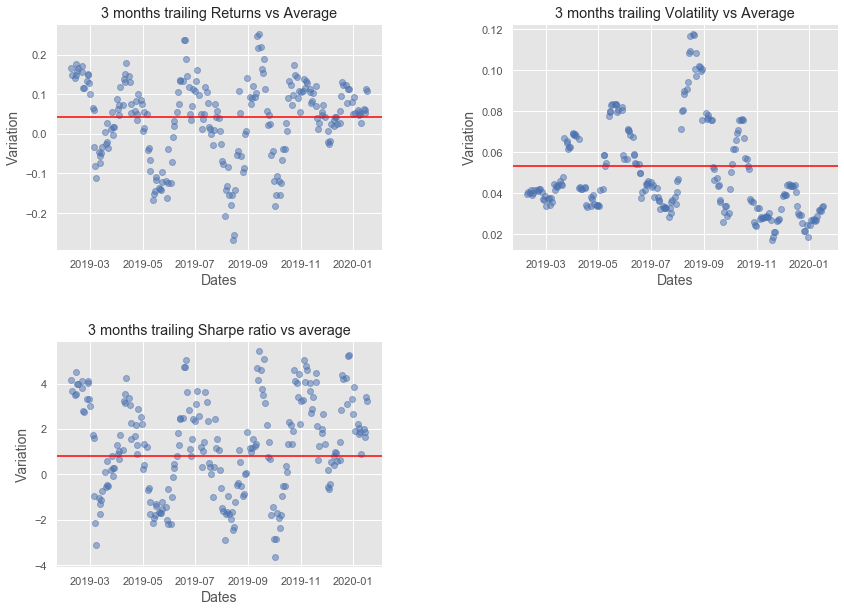

In [64]:
fig9 =plt.figure(figsize=(14,10))
plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots
plt.subplot(222)
plt.plot(port_matrix.volatility, 'bo',alpha=0.5)
plt.axhline(Expected_Std_VSGX, color = 'red')
plt.xlabel('Dates',fontsize=14)
plt.ylabel('Variation',fontsize=14)
plt.title('3 months trailing Volatility vs Average')

plt.subplot(221)
plt.plot(port_matrix.returns, 'bo',alpha = 0.5)
plt.axhline(Expected_Return_VSGX,color = 'red')

plt.xlabel('Dates',fontsize=14)
plt.ylabel('Variation',fontsize=14)
plt.title('3 months trailing Returns vs Average')

plt.subplot(223)
plt.plot(port_matrix.sharpe, 'bo',alpha = 0.5)
plt.axhline(Sharpe_VSGX,color = 'red')


plt.xlabel('Dates',fontsize=14)
plt.ylabel('Variation',fontsize=14)
plt.title('3 months trailing Sharpe ratio vs average')

plt.show();
fig9.savefig('trailings.png',dpi=fig9.dpi)